Title: DSC350 Week 6 Exercises  
Author: Stefanie Molin  
Date: 13 October 2024  
Modified By: Caleb Trimble  
Description: This program executes various functions showing different visualization capabilities for matplotlib using stock prices for Facebook in 2018 and earthquake data.  
Codes in this program have been adapted from Hands-On Data Analysis with Pandas - Second Edition (Molin S., 2021)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes.csv')


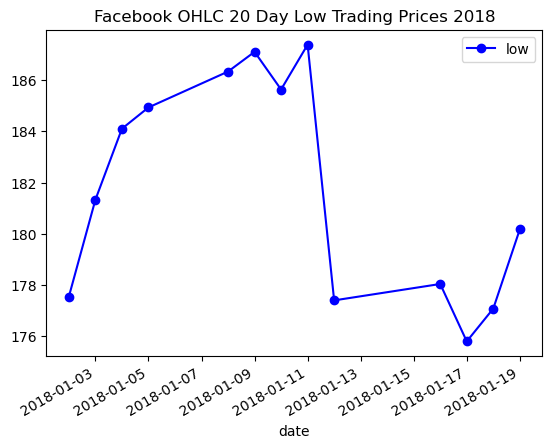

In [13]:
# Problem 1 - Plots the rolling 20 Day minimum (low) of the closing price.
fb.first('20D').plot(
    y=['low'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC 20 Day Low Trading Prices 2018'
).autoscale()

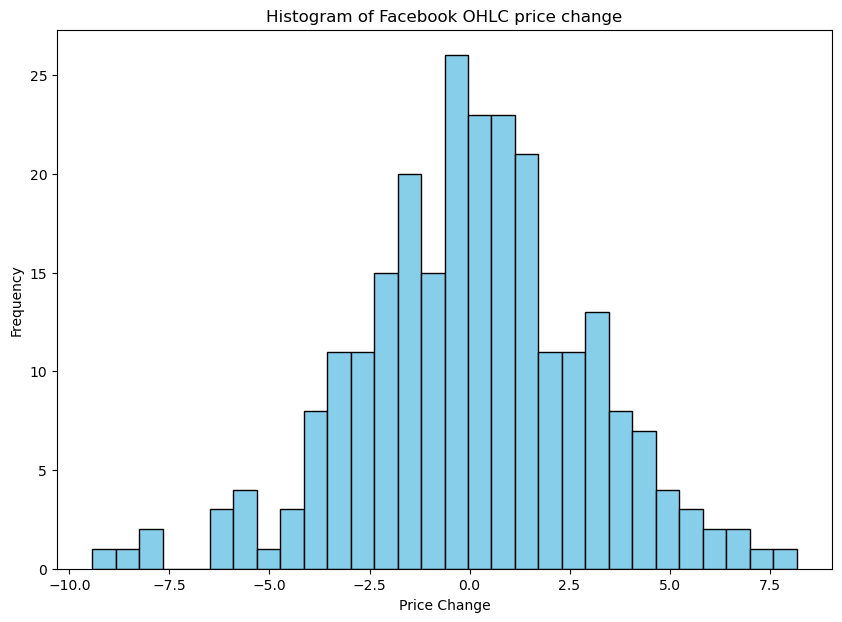

Text(0.5, 0, 'Price ($)')

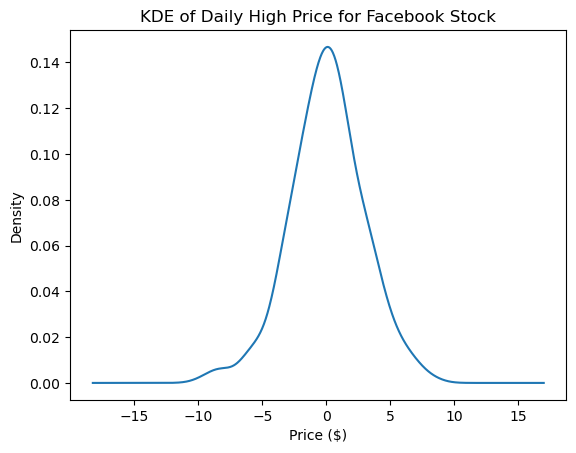

In [17]:
# Problem 2 
# Adds column to the DataFrame that calculates the difference between closing and opening prices.
fb['price_change'] = fb['close'] - fb['open']
plt.figure(figsize=(10, 7))
# Defines type of chart, the data to visualize, along with visual aspects.
plt.hist(fb['price_change'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Facebook OHLC price change')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()
print()
# Creates a KDE plot that tracks the daily open and close prices.
fb.price_change.plot(
    kind='kde', 
    title='KDE of Daily Open and Close Prices for Facebook Stock'
)
plt.xlabel('Price ($)')

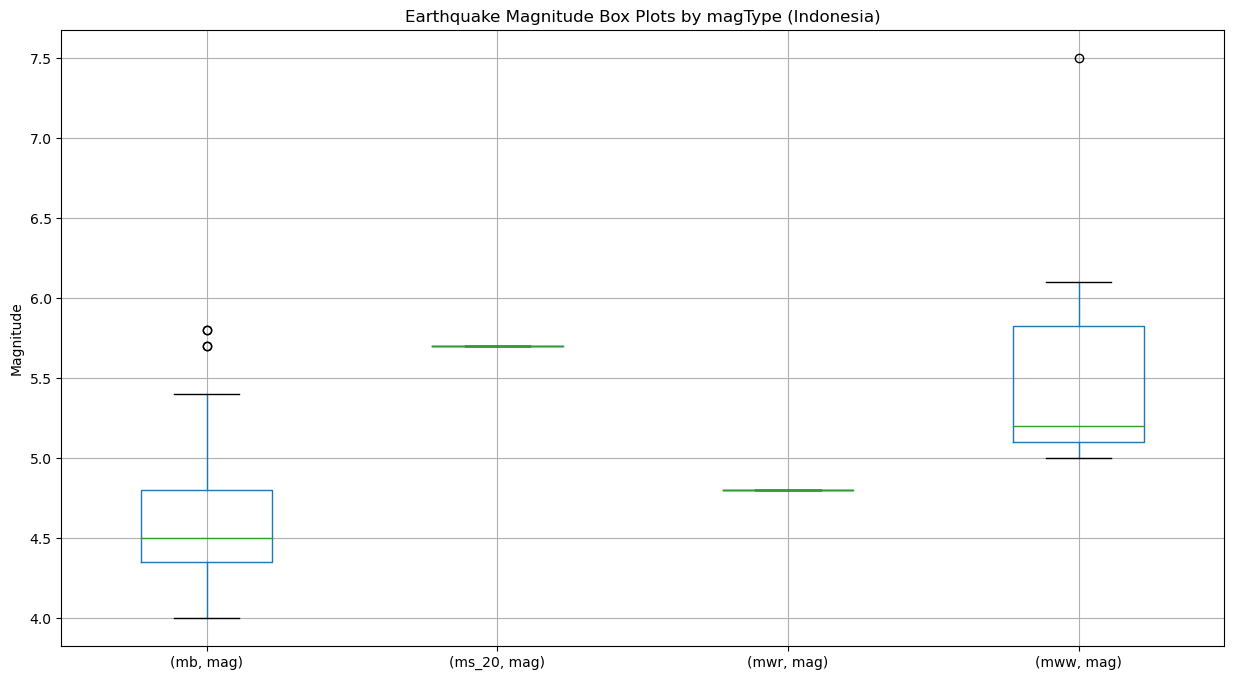

In [20]:
# Problem 3
# Filters the DataFrame for Indonesia
quakes_indonesia = quakes[quakes['parsed_place'] == 'Indonesia']

# Creates a boxplot for Indonesia using the mag and magType columns, then groups the data by column magType.
quakes_indonesia[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType (Indonesia)')
plt.ylabel('Magnitude')
plt.show()


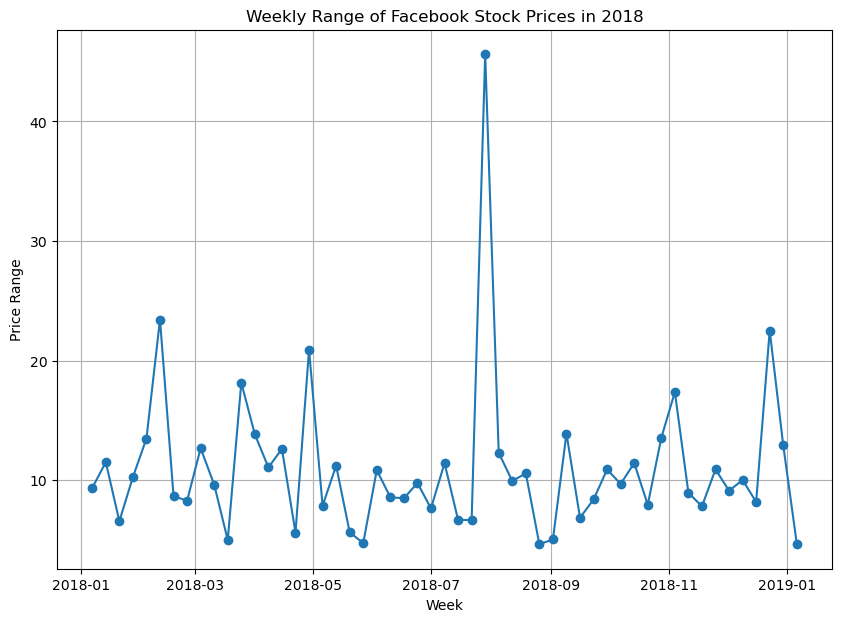

In [30]:
# Problem 4

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fb_stock_prices_2018.csv')

# Converts 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Sets the index as the date.
df.set_index('date', inplace=True)

# Resamples to weekly and calculates the range (max high - min low)
weekly_range = df['high'].resample('W').max() - df['low'].resample('W').min()

# Creates a line plot showing the weekly range of stocks.
plt.figure(figsize=(10, 7))
plt.plot(weekly_range, marker='o', linestyle='-')
plt.title('Weekly Range of Facebook Stock Prices in 2018')
plt.xlabel('Week')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()


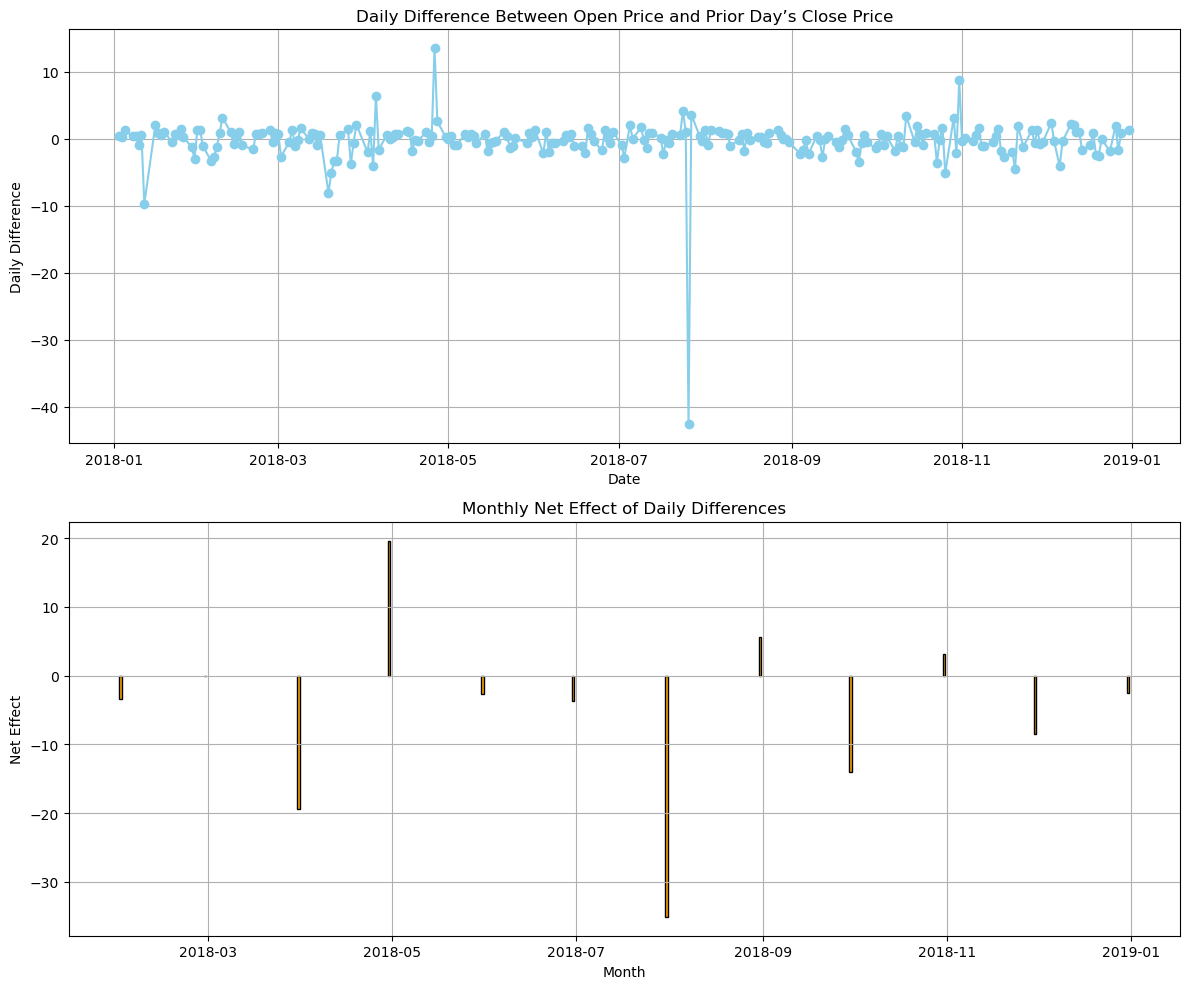

In [35]:
# Problem 6

# Set the date as the index
df.set_index('date', inplace=True)

# Calculates daily difference between opening price and the prior day's closing price
df['daily_diff'] = df['open'] - df['close'].shift(1)

# Resamples the net effect to monthly
monthly_net_effect = df['daily_diff'].resample('M').sum()

# Creates the subplots using a tuple. Specifies the grid layout of the subplots. 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Subplot 1: Line plot for daily difference
ax1.plot(df.index, df['daily_diff'], marker='o', linestyle='-', color='skyblue')
ax1.set_title('Daily Difference Between Open Price and Prior Day’s Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Difference')
ax1.grid(True)

# Subplot 2: Bar plot for monthly net effect
ax2.bar(monthly_net_effect.index, monthly_net_effect, color='orange', edgecolor='black')
ax2.set_title('Monthly Net Effect of Daily Differences')
ax2.set_xlabel('Month')
ax2.set_ylabel('Net Effect')
ax2.grid(True)

plt.tight_layout()
plt.show()
